In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/VK_ML_test/test_spam.csv')
df_test.head()

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...


In [5]:
df_test

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...
...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...
4066,baylor enron case study cindy yes i shall co a...
4067,boring as compared to tp
4068,hellogorgeous hows u my fone was on charge lst...


In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/VK_ML_test/train_spam.csv')
df_train.head()

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


In [7]:
df_train

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


In [8]:
df_test.isna().sum(), df_train.isna().sum() # Проверка на пустые значения

(text    0
 dtype: int64,
 text_type    0
 text         0
 dtype: int64)

In [9]:
df_test.duplicated().sum(), df_train.duplicated().sum() # Проверка на дубликаты

(0, 11)

In [10]:
df_train = df_train.drop_duplicates(keep='first') # Удаление дуликатов

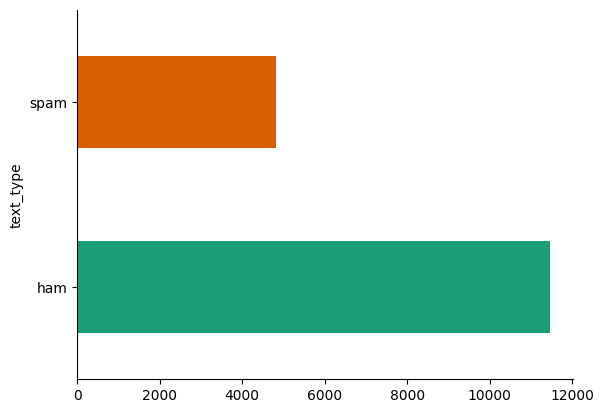

In [ ]:
# @title text_type

from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('text_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_test.shape, df_train.shape

((4070, 1), (16267, 2))

([<matplotlib.patches.Wedge at 0x7f1db4e083a0>,
 [Text(-0.6587221478704808, 0.8809569410050077, ''),
  Text(0.658722065389336, -0.8809570026790227, '')],
 [Text(-0.35930298974753494, 0.4805219678209132, '70%'),
  Text(0.3593029447578196, -0.48052200146128504, '30%')])

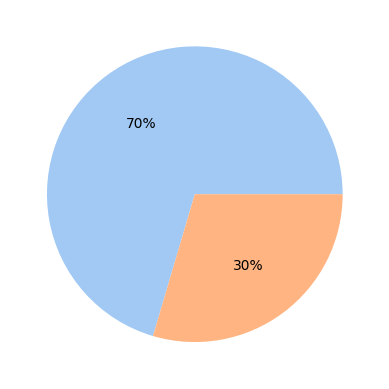

In [ ]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(df_train['text_type'].value_counts(),  colors = colors, autopct='%.0f%%') # пайплот для text_type

In [11]:
df_train['text_type'] = df_train['text_type'].replace({'spam':0, 'ham':1}) # Закодируем переменную text_type

<ipython-input-11-175bed05dff4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text_type'] = df_train['text_type'].replace({'spam':0, 'ham':1}) # Закодируем переменную text_type


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import roc_auc_score

1. Naive Bayes Classifier


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_train['text'], df_train[['text_type']], test_size=0.2, random_state=0) # Разобьем выборку на train/test 80/20
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13013,), (3254,), (13013, 1), (3254, 1))

In [ ]:
nb_param_grid = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False]
}

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
x_train_vectorized = vectorizer.fit_transform(x_train) # Векторезируем тренировочную выборку

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., '𝟷𝚂𝚃', '𝟷𝟶𝟶𝟶0', '𝟻𝟶𝟶𝟶'], dtype=object)

In [ ]:
x_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test_vectorized = vectorizer.transform(x_test) # Векторезируем текстовую выборку выборку

In [ ]:
x_test_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
grid_search = GridSearchCV(MultinomialNB(), nb_param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

In [ ]:
# nb_predictions = clf.predict(x_test_vectorized)
grid_search.fit(x_train_vectorized, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10], 'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.1, 'fit_prior': True}


In [ ]:
best_nb = grid_search.best_estimator_
nb_predictions = best_nb.predict(x_test_vectorized)

In [ ]:
y_test.value_counts()

text_type
1            2293
0             963
Name: count, dtype: int64

In [ ]:
nb_roc_auc = roc_auc_score(y_test, nb_predictions)
nb_roc_auc

0.9155894118131892

Лучший Naive Bayes clf имеет параметры: alpha=0.1, fit_prior=True. roc_auc_score для лучшей модели равен примерно 0.915




2. Support Vector Machines

In [12]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [23]:
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [18]:
x_train_vectorized.shape

(13013, 46950)

In [19]:
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
svm_grid_search.fit(x_train_vectorized, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [20]:
print("Best Parameters:", svm_grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [21]:
best_svm = svm_grid_search.best_estimator_
svm_predictions = best_svm.predict(x_test_vectorized)

In [22]:
svm_roc_auc = roc_auc_score(y_test, svm_predictions)
svm_roc_auc

0.9315074651264168

Best SVC have those params: C=10, gamma=1, kernel=rbf. roc auc score for best SVC is around 0.931

Лучший SVC имеет параметры: C=10, gamma=1. roc_auc_score для лучшей модели равен примерно 0.931

3.BERT + RandomForest

In [ ]:
from sklearn.linear_model import LogisticRegression
import torch
import transformers

In [ ]:
torch.__version__

'2.2.1+cu121'

In [ ]:
# Инициализируем модель и токенезатор, также скачиваем предобученые веса distilBERT. Был выбран именно DistilBERT, тк у нее меньше весов чем у обычного BERT
model_class, tokenizer_class, pretrained_weights = (
    transformers.DistilBertModel,
    transformers.DistilBertTokenizer,
    'distilbert-base-uncased'
)

In [ ]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
np.random.seed(0)
batch = df_train.sample(700) # Взят сэмпл размера 700, тк это максимальное количество объектов, которые можно обработать с имеющимся RAM

In [ ]:
tokenized = batch['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
tokenized.head()

9597     [101, 10751, 19362, 2213, 1040, 16048, 19481, ...
10713    [101, 9529, 19037, 12159, 2116, 4283, 1045, 20...
6978     [101, 5199, 12420, 2626, 2057, 2310, 2025, 206...
2092     [101, 1051, 2594, 2522, 2015, 2033, 1050, 2026...
4298     [101, 1045, 2572, 3228, 1057, 7706, 2454, 7048...
Name: text, dtype: object

In [ ]:
tokenized.shape

(700,)

padding

In [ ]:
max_len = 0
for i in tokenized.values:
  if len(i) > max_len:
    max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

In [ ]:
padded.shape

(700, 243)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(700, 243)

In [ ]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
last_hidden_states[0].shape

torch.Size([700, 243, 768])

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch['text_type']

In [ ]:
train_f, test_f, train_l, test_l = train_test_split(features, labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param_grid, scoring='roc_auc')
grid_search.fit(train_f, train_l)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'n_estimators': 300}


In [ ]:
best_rf = grid_search.best_estimator_
rf_predictions = best_rf.predict(test_f)

In [ ]:
roc_auc_score(test_l, rf_predictions)

0.876

Лучший RandomForestCLF имеет параметры: criterion: entropy, n_estimators: 300. roc_auc_score для него равен 0.876. Скорее всего можно улучшить результат модели если увеличить размер тренировочной выборки.

В результате проведенной выше работы получилось, что лучше вчего себя показал SVC с roc_auc_score 0.925



Применим лучшую модель к тестовой выборке и запишем результат в файл result.csv

In [24]:
test_vectorized = vectorizer.transform(df_test['text'])

In [25]:
test_redictions = best_svm.predict(test_vectorized)

In [26]:
df_test['text_type'] = test_redictions

In [27]:
df_test['text_type'] = df_test['text_type'].replace({0:'spam', 1:'ham'})
df_test.head(15)

,text,text_type
0,j jim whitehead ejw cse ucsc edu writes j you ...,ham
1,original message from bitbitch magnesium net p...,ham
2,java for managers vince durasoft who just taug...,ham
3,there is a youtuber name saiman says,ham
4,underpriced issue with high return on equity t...,spam
5,aight lemme know whats up,ham
6,hey girl how r u hope u r well me an del r bak...,ham
7,carnegie mellon recruiting good afternoon i ha...,ham
8,cv of rodney greene re quantitative positions ...,ham
9,i cant able to cos of me he drunk today im rea...,ham


In [28]:
df_test.to_csv('result.csv')